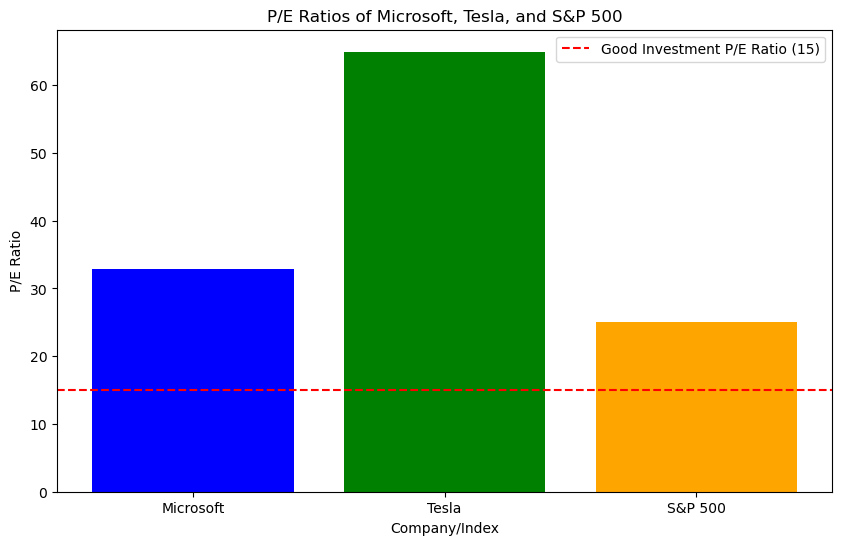

In [8]:
import matplotlib.pyplot as plt

# Example data for Microsoft, Tesla, and S&P 500
data = {
    'Microsoft': {'price': 330, 'eps': 10.03},
    'Tesla': {'price': 250, 'eps': 3.85},
    'S&P 500': {'price': 4500, 'eps': 180}
}

# Function to calculate P/E Ratio
def calculate_pe_ratio(price, eps):
    return price / eps

# Calculate P/E Ratios
pe_ratios = {name: calculate_pe_ratio(info['price'], info['eps']) for name, info in data.items()}

# Plotting the P/E Ratios
plt.figure(figsize=(10, 6))
plt.bar(pe_ratios.keys(), pe_ratios.values(), color=['blue', 'green', 'orange'])

# Add a horizontal line for the "good investment" P/E ratio threshold
good_investment_pe = 15
plt.axhline(y=good_investment_pe, color='red', linestyle='--', label=f'Good Investment P/E Ratio ({good_investment_pe})')

# Adding titles and labels
plt.title('P/E Ratios of Microsoft, Tesla, and S&P 500')
plt.ylabel('P/E Ratio')
plt.xlabel('Company/Index')

# Adding legend
plt.legend()

# Show the plot
plt.show()

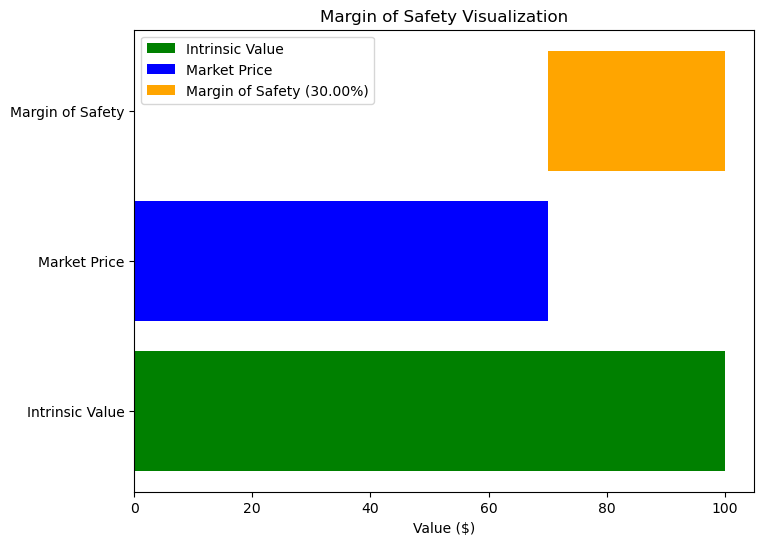

In [1]:
import matplotlib.pyplot as plt


def margin_of_safety(intrinsic_value, market_price):
    if intrinsic_value <= 0:
        return "Intrinsic value must be greater than 0."
    margin = (intrinsic_value - market_price) / intrinsic_value * 100
    return margin

# Example values
intrinsic_value = 100  # You can replace this with any value
market_price = 70      # You can replace this with any value

# Calculate the margin of safety
mos = margin_of_safety(intrinsic_value, market_price)

# Visualization


def visualize_margin_of_safety(intrinsic_value, market_price, margin_of_safety):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Bar for intrinsic value
    ax.barh('Intrinsic Value', intrinsic_value, color='green', label='Intrinsic Value')

    # Bar for market price
    ax.barh('Market Price', market_price, color='blue', label='Market Price')

    # Bar for margin of safety
    ax.barh('Margin of Safety', intrinsic_value - market_price, left=market_price, color='orange', label=f'Margin of Safety ({margin_of_safety:.2f}%)')

    # Labels and title
    ax.set_xlabel('Value ($)')
    ax.set_title('Margin of Safety Visualization')
    ax.legend()

    # Show plot
    plt.show()

# Visualize the margin of safety
visualize_margin_of_safety(intrinsic_value, market_price, mos)

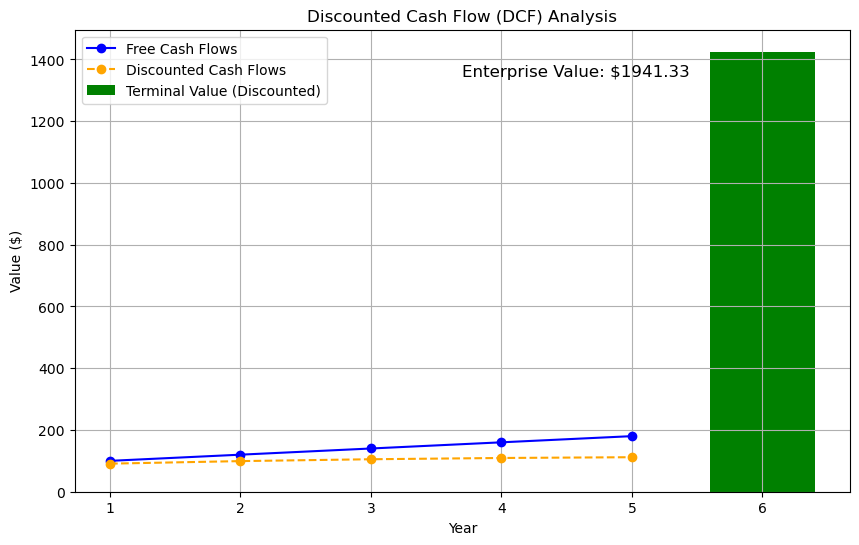

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_dcf(free_cash_flows, wacc, terminal_growth_rate, terminal_year):
    # Discount factor for each year
    discount_factors = [(1 / (1 + wacc) ** year) for year in range(1, len(free_cash_flows) + 1)]
    
    # Present value of free cash flows
    discounted_fcfs = [fcf * df for fcf, df in zip(free_cash_flows, discount_factors)]
    
    # Terminal value calculation
    terminal_value = free_cash_flows[-1] * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)
    
    # Present value of terminal value
    terminal_value_discounted = terminal_value / (1 + wacc) ** terminal_year
    
    # Enterprise value
    enterprise_value = sum(discounted_fcfs) + terminal_value_discounted
    
    return discounted_fcfs, terminal_value_discounted, enterprise_value

# Example inputs
free_cash_flows = [100, 120, 140, 160, 180]  # Forecasted free cash flows for 5 years
wacc = 0.10  # Discount rate (10%)
terminal_growth_rate = 0.02  # Terminal growth rate (2%)
terminal_year = len(free_cash_flows)

# Calculate DCF
discounted_fcfs, terminal_value_discounted, enterprise_value = calculate_dcf(
    free_cash_flows, wacc, terminal_growth_rate, terminal_year
)

# Visualization
def visualize_dcf(free_cash_flows, discounted_fcfs, terminal_value_discounted, enterprise_value):
    years = list(range(1, len(free_cash_flows) + 1))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotting free cash flows and discounted cash flows
    ax.plot(years, free_cash_flows, marker='o', linestyle='-', color='blue', label='Free Cash Flows')
    ax.plot(years, discounted_fcfs, marker='o', linestyle='--', color='orange', label='Discounted Cash Flows')
    
    # Adding terminal value to the last year
    ax.bar([terminal_year + 1], [terminal_value_discounted], color='green', label=f'Terminal Value (Discounted)')
    
    # Labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Value ($)')
    ax.set_title('Discounted Cash Flow (DCF) Analysis')
    ax.legend()
    
    # Display enterprise value
    ax.text(0.5, 0.9, f'Enterprise Value: ${enterprise_value:.2f}', transform=ax.transAxes, fontsize=12, color='black')
    
    plt.grid(True)
    plt.show()

# Visualize DCF Analysis
visualize_dcf(free_cash_flows, discounted_fcfs, terminal_value_discounted, enterprise_value)


In [27]:
#Opis aplikacji:
#
#Funkcja `discounted_cash_flow` służy do obliczenia wartości wewnętrznej firmy na podstawie analizy zdyskontowanych przepływów pieniężnych (DCF).
#Analiza ta jest używana do oceny wartości inwestycji poprzez uwzględnienie przyszłych przepływów pieniężnych,
#które są zdyskontowane do wartości bieżącej. 
#
#Parametry wejściowe:
#- `free_cash_flows`: Lista przewidywanych wolnych przepływów pieniężnych w różnych latach.
#- `discount_rate`: Stopa dyskontowa, używana do przeliczenia przyszłych przepływów pieniężnych na ich wartość obecną.
#- `terminal_growth_rate`: Stopa wzrostu, używana do obliczenia wartości końcowej na podstawie ostatniego przepływu pieniężnego.
#
#Wyjście:
#- `intrinsic_value`: Wartość wewnętrzna firmy, obliczona jako suma zdyskontowanych przepływów pieniężnych i zdyskontowanej wartości końcowej.
#- `discounted_cash_flows`: Lista zdyskontowanych przepływów pieniężnych dla każdego roku.
#- `discounted_terminal_value`: Zdyskontowana wartość końcowa.
#
#Wizualizacja:
#Wykres przedstawia zarówno przewidywane przepływy pieniężne, jak i zdyskontowane przepływy pieniężne oraz wartość końcową. 
#Pomaga to w ocenie, jak przyszłe przepływy pieniężne są wartościowane w bieżących dolarach oraz jakie jest ich znaczenie w kontekście całkowitej
#wartości firmy.

The intrinsic value of the company is: $1726.79


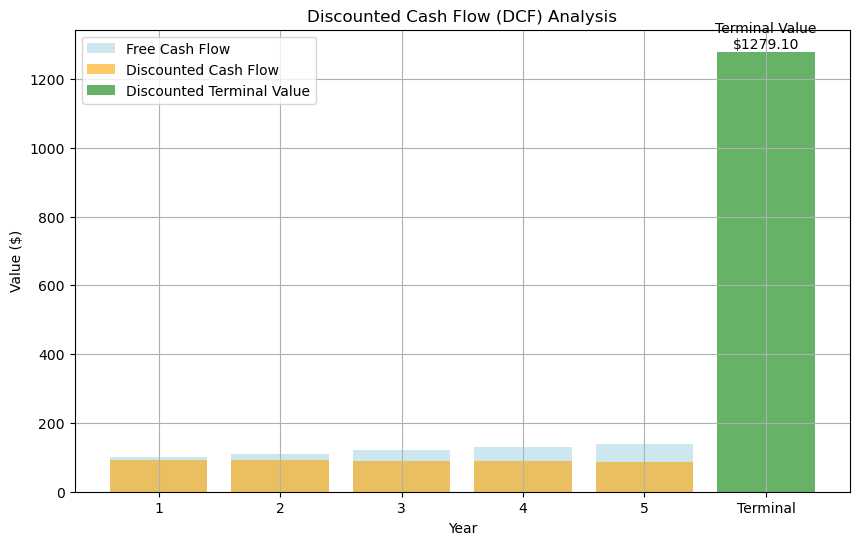

In [5]:
import numpy as np

def discounted_cash_flow(free_cash_flows, discount_rate, terminal_growth_rate):
    years = len(free_cash_flows)
    discounted_cash_flows = []
    
    # Calculate present value of projected free cash flows
    for i in range(years):
        discounted_cash_flow = free_cash_flows[i] / (1 + discount_rate) ** (i + 1)
        discounted_cash_flows.append(discounted_cash_flow)
    
    # Calculate terminal value
    terminal_value = free_cash_flows[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)
    discounted_terminal_value = terminal_value / (1 + discount_rate) ** years
    
    # Sum of discounted cash flows and discounted terminal value
    intrinsic_value = sum(discounted_cash_flows) + discounted_terminal_value
    
    return intrinsic_value, discounted_cash_flows, discounted_terminal_value

# Example inputs
free_cash_flows = [100, 110, 120, 130, 140]  # Free cash flows over 5 years
discount_rate = 0.10  # 10% discount rate
terminal_growth_rate = 0.03  # 3% terminal growth rate

# Calculate intrinsic value
intrinsic_value, discounted_cash_flows, discounted_terminal_value = discounted_cash_flow(free_cash_flows, discount_rate, terminal_growth_rate)

# Output the intrinsic value
print(f"The intrinsic value of the company is: ${intrinsic_value:.2f}")

# To visualize the DCF analysis
import matplotlib.pyplot as plt

# Visualization
years = list(range(1, len(free_cash_flows) + 1))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot free cash flows
ax.bar(years, free_cash_flows, color='lightblue', label='Free Cash Flow', alpha=0.6)

# Plot discounted cash flows
ax.bar(years, discounted_cash_flows, color='orange', label='Discounted Cash Flow', alpha=0.6)

# Add terminal value as a separate bar
ax.bar(years[-1] + 1, discounted_terminal_value, color='green', label='Discounted Terminal Value', alpha=0.6)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Value ($)')
ax.set_title('Discounted Cash Flow (DCF) Analysis')
ax.legend()

# Annotate DCF value
ax.text(years[-1] + 1, discounted_terminal_value, f'Terminal Value\n${discounted_terminal_value:.2f}', ha='center', va='bottom')

# Show plot
plt.xticks(years + [years[-1] + 1], labels=[str(year) for year in years] + ['Terminal'])
plt.grid(True)
plt.show()


In [15]:
# Opis aplikacji:
# Funkcja oblicz_eps:
# - Wejście: Zysk netto i liczba akcji.
# - Wyjście: EPS (Earnings Per Share), czyli zysk netto przypadający na jedną akcję.
# - Użycie: Funkcja oblicza EPS jako zysk netto podzielony przez liczbę akcji.
#   Jeśli liczba akcji jest zerowa, funkcja zgłasza błąd.
#   Wzór na EPS to: EPS = Zysk Netto / Liczba Akcji

# Przykładowe dane:
# - lata: Lista lat, dla których obliczamy EPS.
# - zyski_netto: Lista zysków netto firmy w różnych latach.
# - liczba_akcji: Liczba akcji, które są w obiegu.

# Obliczanie EPS:
# - Dla każdego roku obliczamy EPS używając funkcji oblicz_eps i zapisujemy wyniki w liście eps.

# Wizualizacja:
# - Wykres liniowy: Na wykresie pokazujemy zmiany EPS w różnych latach. Używamy markerów i linii, aby lepiej zobrazować zmiany.
# - Etykiety: Dodajemy etykiety z wartościami EPS do poszczególnych punktów na wykresie, aby ułatwić odczyt wyników.

# Opis wykresu:
# - Oś X przedstawia lata, a oś Y przedstawia EPS w PLN. Tytuł wykresu oraz etykiety osi pomagają zrozumieć, co przedstawia wykres.

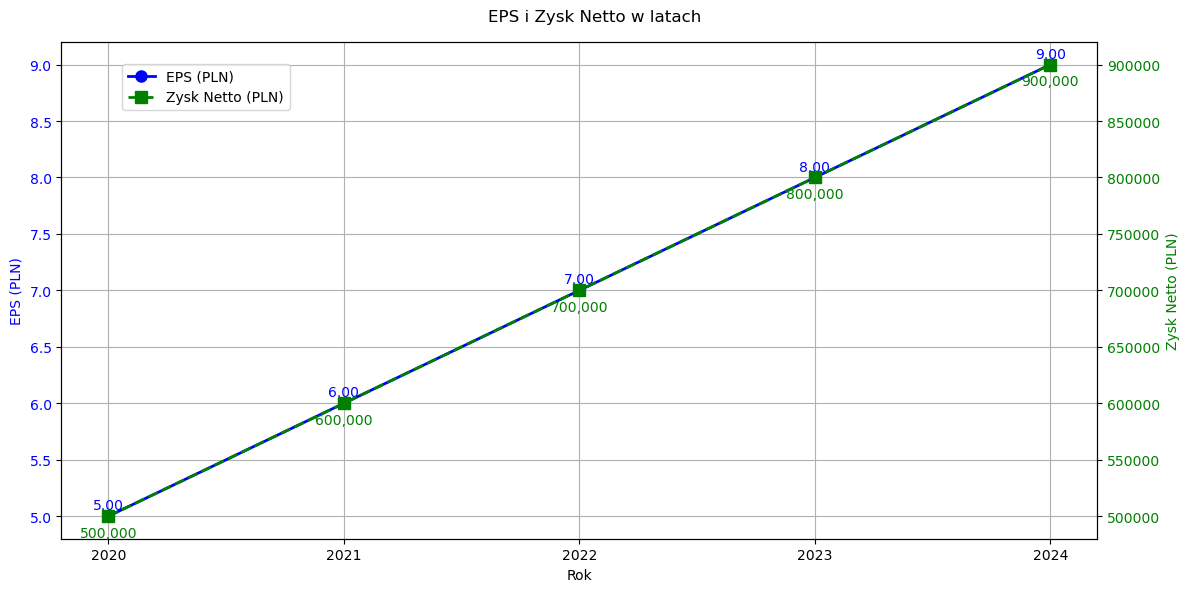

In [17]:
import matplotlib.pyplot as plt

def oblicz_eps(zysk_netto, liczba_akcji):
    """
    Funkcja oblicza EPS (Earnings Per Share).
    
    :param zysk_netto: Zysk netto firmy.
    :param liczba_akcji: Liczba akcji firmy.
    :return: EPS (Earnings Per Share).
    """
    if liczba_akcji == 0:
        raise ValueError("Liczba akcji nie może być zerowa.")
    return zysk_netto / liczba_akcji

# Przykładowe dane
lata = ['2020', '2021', '2022', '2023', '2024']
zyski_netto = [500000, 600000, 700000, 800000, 900000]  # Zysk netto w PLN
liczba_akcji = 100000  # Liczba akcji firmy

# Obliczanie EPS dla każdego roku
eps = [oblicz_eps(zysk, liczba_akcji) for zysk in zyski_netto]

# Wizualizacja EPS
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wykres EPS
ax1.plot(lata, eps, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='EPS (PLN)')
ax1.set_xlabel('Rok')
ax1.set_ylabel('EPS (PLN)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Dodawanie wartości EPS na wykresie
for i, txt in enumerate(eps):
    ax1.annotate(f'{txt:.2f}', (lata[i], eps[i]), textcoords="offset points", xytext=(0,5), ha='center', color='blue')

# Tworzenie drugiej osi Y dla wartości netto
ax2 = ax1.twinx()
ax2.plot(lata, zyski_netto, marker='s', color='green', linestyle='--', linewidth=2, markersize=8, label='Zysk Netto (PLN)')
ax2.set_ylabel('Zysk Netto (PLN)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Dodawanie wartości netto na wykresie
for i, txt in enumerate(zyski_netto):
    ax2.annotate(f'{txt:,}', (lata[i], zyski_netto[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Tytuł wykresu
fig.suptitle('EPS i Zysk Netto w latach')

# Legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Siatka
ax1.grid(True)

plt.tight_layout()
plt.show()


In [29]:
import numpy as np
from scipy.optimize import minimize

# Przykładowe dane: zwroty i macierz kowariancji
expected_returns = np.array([0.12, 0.18, 0.15])  # oczekiwane zwroty z inwestycji
cov_matrix = np.array([
    [0.005, -0.010, 0.004],
    [-0.010, 0.040, -0.002],
    [0.004, -0.002, 0.023]
])  # macierz kowariancji

# Funkcja celu do minimalizacji (zamiast maksymalizacji)
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Ograniczenia (całość inwestycji = 1)
constraints = ({
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
})

# Ograniczenia dla wag (każda waga musi być między 0 a 1)
bounds = tuple((0, 1) for _ in range(len(expected_returns)))

# Początkowe wartości wag (równe rozłożenie na wszystkie aktywa)
initial_weights = np.array([1./len(expected_returns) for _ in range(len(expected_returns))])

# Optymalizacja portfela
optimal_solution = minimize(portfolio_variance, initial_weights,
                            args=(cov_matrix,), method='SLSQP',
                            bounds=bounds, constraints=constraints)

# Wynik
if optimal_solution.success:
    optimal_weights = optimal_solution.x
    expected_portfolio_return = np.dot(optimal_weights, expected_returns)
    portfolio_risk = np.sqrt(portfolio_variance(optimal_weights, cov_matrix))
    
    print("Optymalne wagi portfela (proporcje inwestycji):")
    for i, weight in enumerate(optimal_weights):
        print(f"Aktywo {i+1}: {weight:.2%}")
    
    print(f"\nOczekiwany zwrot portfela: {expected_portfolio_return:.2%}")
    print(f"Ryzyko portfela (odchylenie standardowe): {portfolio_risk:.2%}")
else:
    print("Nie udało się znaleźć optymalnego rozwiązania.")


Optymalne wagi portfela (proporcje inwestycji):
Aktywo 1: 76.92%
Aktywo 2: 23.08%
Aktywo 3: 0.00%

Oczekiwany zwrot portfela: 13.38%
Ryzyko portfela (odchylenie standardowe): 3.92%
